<a href="https://colab.research.google.com/github/namwootree/Portfolio/blob/main/Competition/Kaggle/Scrabble%20Player%20Rating/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

## Library

In [30]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

## Google Drive Mount

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip File

In [27]:
!unzip -qq '/content/drive/MyDrive/머신러닝 엔지니어링/Kaggle/Scrabble Player Rating/data/scrabble-player-rating.zip'

# Load Data

In [4]:
path_save = '/content/drive/MyDrive/머신러닝 엔지니어링/Kaggle/Scrabble Player Rating/submission/'

In [45]:
XGB = pd.read_csv(path_save + 'submission_optuna_XGB.csv')
LGBM = pd.read_csv(path_save + 'submission_optuna_LGBM.csv')
CAT = pd.read_csv(path_save + 'submission_optuna_CAT.csv')

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
test.dropna(inplace=True)

In [46]:
XGB.head()

,game_id,rating
0,2,1990.9109
1,7,1897.4026
2,11,1872.5504
3,14,1812.9038
4,27,2071.3423


In [47]:
LGBM.head()

,game_id,rating
0,2,1976.971409
1,7,1937.503328
2,11,1831.060307
3,14,1839.620779
4,27,2099.928414


In [48]:
CAT.head()

,game_id,rating
0,2,1966.435577
1,7,1869.961096
2,11,1819.405743
3,14,1807.394672
4,27,2036.691487


# Ensemble

In [63]:
np.array(XGB['rating'])

array([1990.9109, 1897.4026, 1872.5504, ..., 1509.1743, 2088.9275,
       1852.9949])

In [64]:
results = [np.array(XGB['rating']),
           np.array(LGBM['rating']),
           np.array(CAT['rating'])]

In [65]:
final_preds = np.mean(results, axis=0)

In [66]:
final_preds

array([1978.10596227, 1901.62234133, 1841.0054831 , ..., 1529.42910252,
       2059.22636969, 1870.04756137])

In [67]:
# results = [np.array(XGB['rating'])*0.7,
#            np.array(LGBM['rating'])*0.2,
#            np.array(CAT['rating'])*0.1]

# final_preds = np.sum(results, axis=0)

Text(0.5, 1.0, 'Distribution of Predicted Ratings')

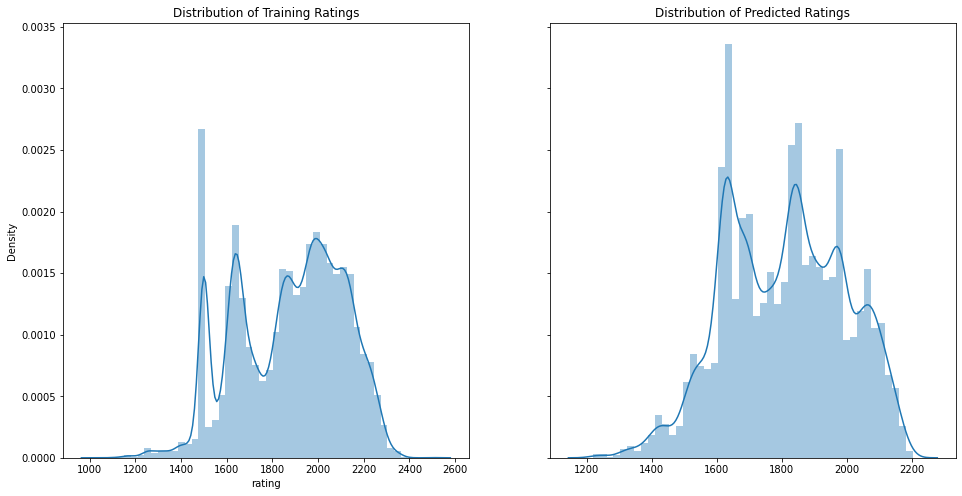

In [68]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16,8))
sns.distplot(train['rating'], ax=axs[0])
axs[0].set_title("Distribution of Training Ratings")
sns.distplot(final_preds , ax=axs[1])
axs[1].set_title("Distribution of Predicted Ratings")

In [69]:
test['rating'] = final_preds
submission = test['rating']

path_save = '/content/drive/MyDrive/머신러닝 엔지니어링/Kaggle/Scrabble Player Rating/submission/'
submission.to_csv(path_save + "submission_optuna_Ensemble.csv")